# Market Sector Data Analysis & ML Project
## NIJ6: Anica Bhargava, Alex Eng, Mandy Hsu, Deyvi Ortiz

In this project, we analyze a year's worth of market data by sector, create models for predicting overall stock market performance from sample sets of tickers, and finally build an API for using those models to get predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as pdr

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## 1. Import Sector Data

For each sector, choose a small set of stocks to train our model on.

In [2]:
# tech (Alex), consumer staples (Mandy), energy (Anica), financials (Deyvi)
energy_tickers = ["CVX", "PXD", "VLO", "CXO", "PSX", "VTSAX"]
startDate = '2019-9-1'
endDate ='2020-9-1'

In [3]:
energy_df = pdr.data.DataReader(energy_tickers, 
                       start = startDate, 
                       end = endDate, 
                       data_source='yahoo')

energy_df

Attributes   Adj Close                                               \
Symbols            CVX         PXD        VLO        CXO        PSX   
Date                                                                  
2019-09-03  110.564812  120.005424  70.663864  68.615318  95.146584   
2019-09-04  111.496735  121.690941  70.862854  72.103394  95.357025   
2019-09-05  111.867584  125.963539  72.767570  69.524384  95.462242   
2019-09-06  112.457169  126.286926  74.037384  68.852463  96.523987   
2019-09-09  113.531715  129.354187  75.221901  73.358307  97.729218   
...                ...         ...        ...        ...        ...   
2020-08-26   84.779999  104.410004  53.700001  51.080002  60.029999   
2020-08-27   84.910004  105.379997  53.439999  51.810001  60.259998   
2020-08-28   85.629997  105.599998  54.889999  52.259998  61.790001   
2020-08-31   83.930000  103.930000  52.590000  51.980000  58.470001   
2020-09-01   83.080002  102.980003  52.470001  51.139999  58.790001   

Attributes                  Close                                    ...  \
Symbols         VTSAX         CVX         PXD        VLO        CXO  ...   
Date                                                                 ...   
2019-09-03  70.661659  116.269997  122.459999  74.570000  69.440002  ...   
2019-09-04  71.426735  117.250000  124.180000  74.779999  72.970001  ...   
2019-09-05  72.378181  117.639999  128.539993  76.790001  70.360001  ...   
2019-09-06  72.407608  118.260002  128.869995  78.129997  69.680000  ...   
2019-09-09  72.437035  119.389999  132.000000  79.379997  74.239998  ...   
...               ...         ...         ...        ...        ...  ...   
2020-08-26  85.680000   84.779999  104.410004  53.700001  51.080002  ...   
2020-08-27  85.879997   84.910004  105.379997  53.439999  51.810001  ...   
2020-08-28  86.470001   85.629997  105.599998  54.889999  52.259998  ...   
2020-08-31  86.349998   83.930000  103.930000  52.590000  51.980000  ...   
2020-09-01  87.080002   83.080002  102.980003  52.470001  51.139999  ...   

Attributes       Open                                       Volume             \
Symbols           VLO        CXO         PSX      VTSAX        CVX        PXD   
Date                                                                            
2019-09-03  73.900002  71.760002   97.279999  72.040001  5672500.0  1115100.0   
2019-09-04  75.459999  71.000000  100.339996  72.820000  4595600.0  1531100.0   
2019-09-05  75.550003  73.500000  100.599998  73.790001  5394300.0  1572000.0   
2019-09-06  77.169998  69.820000  100.129997  73.820000  4578200.0  1173300.0   
2019-09-09  78.699997  70.540001  101.550003  73.849998  5048000.0  1776300.0   
...               ...        ...         ...        ...        ...        ...   
2020-08-26  54.150002  51.040001   61.419998  85.680000  7486500.0  1045600.0   
2020-08-27  53.830002  51.299999   60.180000  85.879997  7438200.0   811000.0   
2020-08-28  53.639999  51.730000   60.349998  86.470001  7307900.0   792000.0   
2020-08-31  55.110001  52.310001   61.849998  86.349998  9437500.0  1439500.0   
2020-09-01  52.279999  51.580002   58.380001  87.080002  8997200.0  1281000.0   

Attributes                                         
Symbols           VLO        CXO        PSX VTSAX  
Date                                               
2019-09-03  2388900.0  7471300.0  2140100.0   0.0  
2019-09-04  2579100.0  3330500.0  1664100.0   0.0  
2019-09-05  4630500.0  3900300.0  2668700.0   0.0  
2019-09-06  3036800.0  4079600.0  2117500.0   0.0  
2019-09-09  2757000.0  2370400.0  2396100.0   0.0  
...               ...        ...        ...   ...  
2020-08-26  4065200.0  1816000.0  3003400.0   0.0  
2020-08-27  3453600.0  1305700.0  3160200.0   0.0  
2020-08-28  3805600.0  1060700.0  2470800.0   0.0  
2020-08-31  4486200.0  1638000.0  3657000.0   0.0  
2020-09-01  3200400.0  1513900.0  3194900.0   0.0  

[253 rows x 36 columns]

## 2. Feature Analysis

In [23]:
temp_X = energy_df["Close"]
X = temp_X[["CVX", "PXD", "VLO", "CXO", "PSX"]]
y = temp_X[["VTSAX"]]
print(y2)
print(X)
print(y)

Symbols     VTSAX
Date             
2019-09-03  False
2019-09-04  False
2019-09-05  False
2019-09-06  False
2019-09-09  False
...           ...
2020-08-26  False
2020-08-27  False
2020-08-28   True
2020-08-31  False
2020-09-01  False

[253 rows x 1 columns]
Symbols            CVX         PXD        VLO        CXO         PSX
Date                                                                
2019-09-03  116.269997  122.459999  74.570000  69.440002   99.470001
2019-09-04  117.250000  124.180000  74.779999  72.970001   99.690002
2019-09-05  117.639999  128.539993  76.790001  70.360001   99.800003
2019-09-06  118.260002  128.869995  78.129997  69.680000  100.910004
2019-09-09  119.389999  132.000000  79.379997  74.239998  102.169998
...                ...         ...        ...        ...         ...
2020-08-26   84.779999  104.410004  53.700001  51.080002   60.029999
2020-08-27   84.910004  105.379997  53.439999  51.810001   60.259998
2020-08-28   85.629997  105.599998  54.889999  52.25

## 3. Regression for VTSAX

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

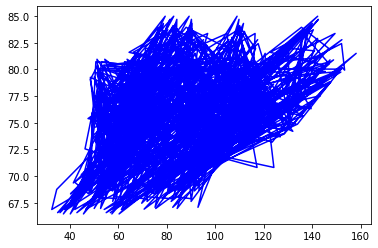

In [22]:
import matplotlib.pyplot as plt
plt.plot(X_train, model.predict(X_train), color='blue')

## 4. Classification for VTSAX

Can tag each VTSAX record with whether or not it increased from yesterday.

In [29]:
# Choose a model to train (e.g. create an object of the type mentioned abeve, or a different scikit learn Classification type)
# the MLPClassifier might take parameters on creation such as: MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Then call model.fit to train your model
from sklearn.model_selection import train_test_split

y2 = y > y.shift(-1)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.2)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)
model.fit(X_train, y2_train.values.ravel())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 5. Cross-Sector Analysis

In [30]:
# import the confusion matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# now call model.predict with the test data
predictions = model.predict(X_test)
predictions
# use predict_proba

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2_test, predictions))

[[31  0]
 [16  4]]


## 6. API with Flask